<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-рассчета-эфективности-обогащения" data-toc-modified-id="Проверка-рассчета-эфективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка рассчета эфективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изучение-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Создание-функции-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание функции для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Для-целевого-признака-'final.output.recovery'" data-toc-modified-id="Для-целевого-признака-'final.output.recovery'-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Для целевого признака 'final.output.recovery'</a></span></li><li><span><a href="#Для-целевого-признака-'rougher.output.recovery'" data-toc-modified-id="Для-целевого-признака-'rougher.output.recovery'-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Для целевого признака 'rougher.output.recovery'</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды и поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [1]:
# импортирую библиотеки
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [2]:
# загружаю данные
try:
    df_full = pd.read_csv('/Users/dariasokolovska/Downloads/gold_recovery_full_new.csv')
    df_test = pd.read_csv('/Users/dariasokolovska/Downloads/gold_recovery_test_new.csv')
    df_train = pd.read_csv('/Users/dariasokolovska/Downloads/gold_recovery_train_new.csv')
except:
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')

In [3]:
# ознакамливаюсь с датасетом gold_recovery_full_new
display(df_full.head(5))
df_full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [4]:
# ознакамливаюсь с датасетом gold_recovery_test_new
display(df_test.head(5))
df_test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
# ознакамливаюсь с датасетом gold_recovery_train_new
display(df_train.head(5))
df_train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

### Проверка рассчета эфективности обогащения

In [6]:
# создаю функцию для рассчета эффективности обогащения
def recovery(row):
    (input_au, output_au, output_tail) = (row['rougher.input.feed_au'], row['rougher.output.concentrate_au'], row['rougher.output.tail_au'])
    recovery_metric = (output_au * (input_au - output_tail)) / (input_au * (output_au - output_tail)) * 100
    return recovery_metric

In [7]:
# рассчитываю эффективность обогащения и добавляю данные отдельным столбцом в датасет
df_train['rougher.output.recovery.calculated'] = df_train.apply(recovery, axis = 1)

In [8]:
# просматриваю исходное значение и расчитанное
display(df_train[['rougher.output.recovery.calculated','rougher.output.recovery']])

,rougher.output.recovery.calculated,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


In [9]:
# вычисляю MAE между моими расчётами и значением признака
mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery.calculated'])

9.73512347450521e-15

MAE имеет очень малое отклонение. Эффективность обогащения рассчитана правильно

### Анализ признаков, недоступных в тестовой выборке

In [10]:
# вычисляю каких признаков нет в тестовой выборке по сравнению с тренировочной
test_absent_columns = df_train.columns.drop(df_test.columns)
test_absent_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Пропущено 34 признака. Отсутствуют все этапы на которых были получены параметры продукта из сырья: rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output. Эти данные будут получены по результатам технологического процесса. Это говорит нам о том, что мы должны удалить из тренировочной выборки эти признаки для построения можели, которую можно будет проверить.

### Предобработка данных

Проверим наличие дубликатов

In [11]:
df_full.duplicated().sum()

0

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

Удалим признаки в обучающей выборке, которых нет в тестовой выборке, но сохраним целевые признаки для дальнейшего обучения модели.

In [14]:
test_absent_columns = test_absent_columns.drop(['final.output.recovery', 'rougher.output.recovery'])

In [15]:
test_absent_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol',
       'final.output.tail_au', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.tail_ag',
       'rougher.outp

In [16]:
df_train = df_train.drop(test_absent_columns, axis=1)

Проверим наличие пропусков в данных

In [17]:
display(df_train.isna().sum().sum())

1705

In [18]:
display(df_test.isna().sum().sum())

90

In [19]:
display(df_full.isna().sum().sum())

4481

Так как соседние по времени параметры часто похожи, сделаем замену пропусков в данных.

In [20]:
df_train = df_train.fillna(method = 'backfill')
df_test = df_test.fillna(method = 'backfill')
df_full = df_full.fillna(method = 'backfill')

Добавим в тестовую выборку значения целевых признаков

In [21]:
df_target = df_full[['date','final.output.recovery', 'rougher.output.recovery']]

In [22]:
df_test = df_test.merge(df_target, how = 'left', on = 'date')

## Анализ данных

### Изучение изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

In [23]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


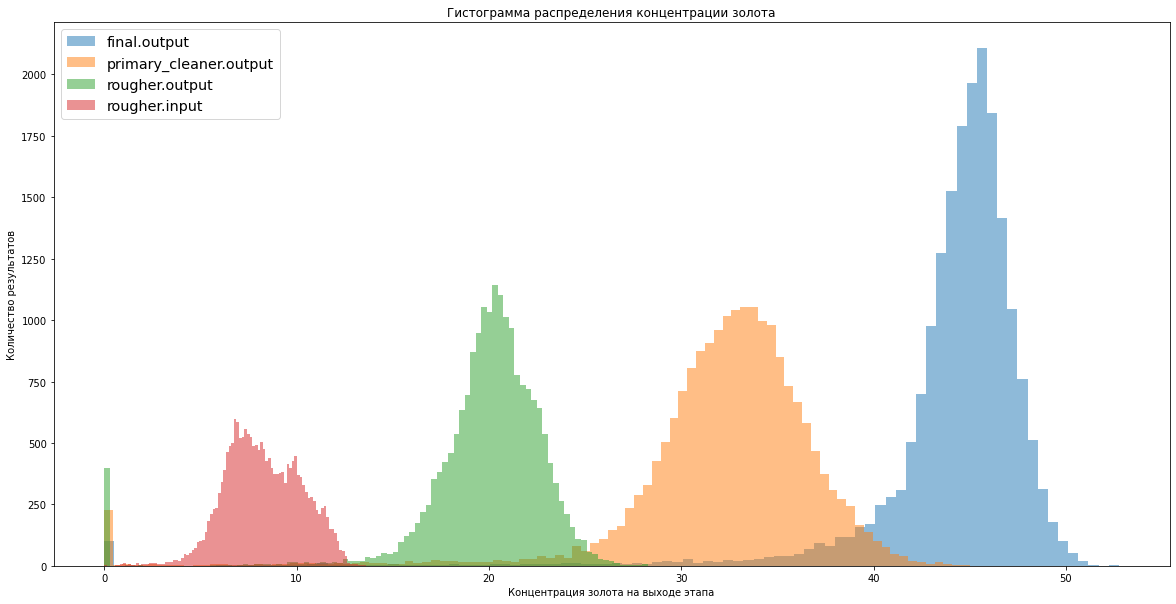

In [24]:
plt.figure(figsize=[20,10])

plt.hist(df_full['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(df_full['rougher.input.feed_au'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlabel("Концентрация золота на выходе этапа")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

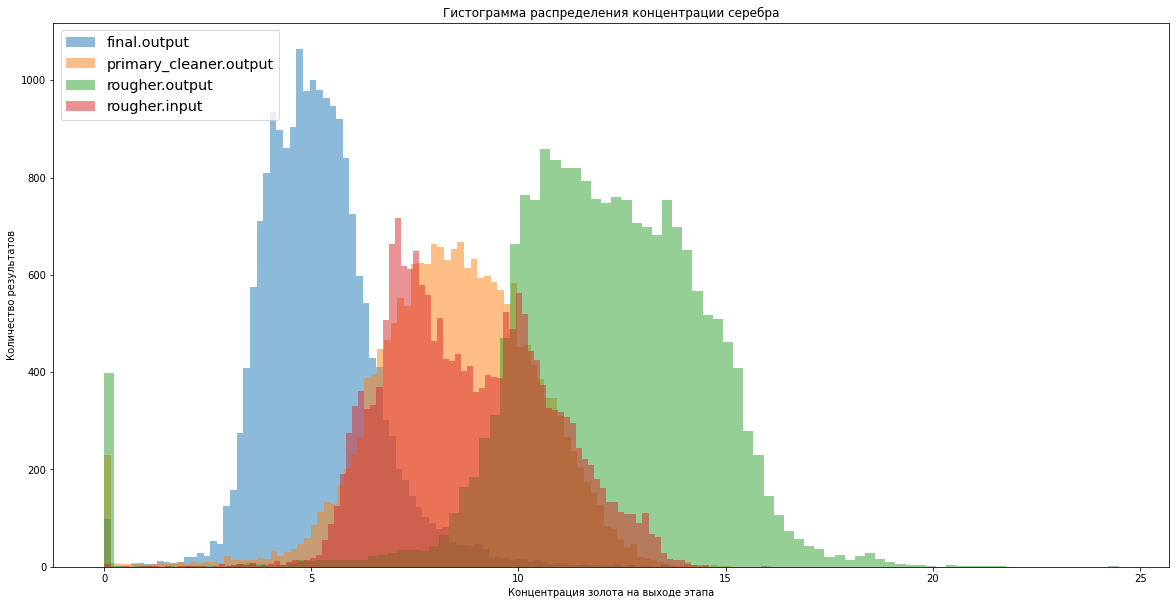

In [25]:
plt.figure(figsize=[20,10])

plt.hist(df_full['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(df_full['rougher.input.feed_ag'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlabel("Концентрация золота на выходе этапа")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

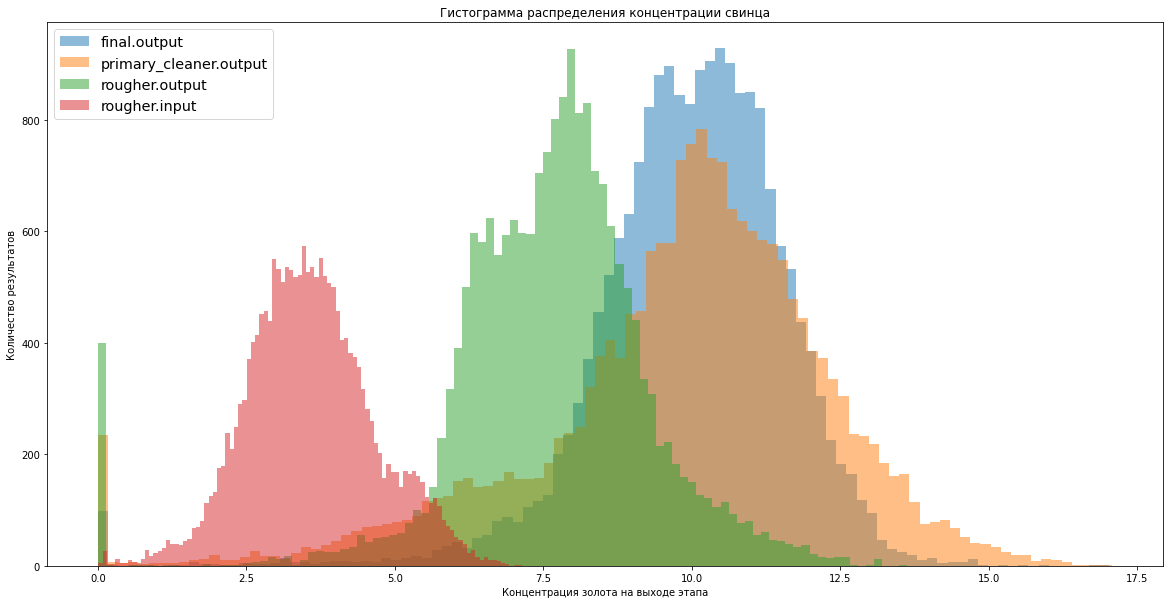

In [26]:
plt.figure(figsize=[20,10])

plt.hist(df_full['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(df_full['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(df_full['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(df_full['rougher.input.feed_pb'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlabel("Концентрация золота на выходе этапа")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

Можно сделать вывод, что с каждым этапом очистки концентрация золота заметно увеличивается, в то время как концентрация серебра во время флотации увеличивается и дальше наоборот снижается. Свинец показывает значительное увеличение во время флотации, а далее небольшое увелечение концентрации.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

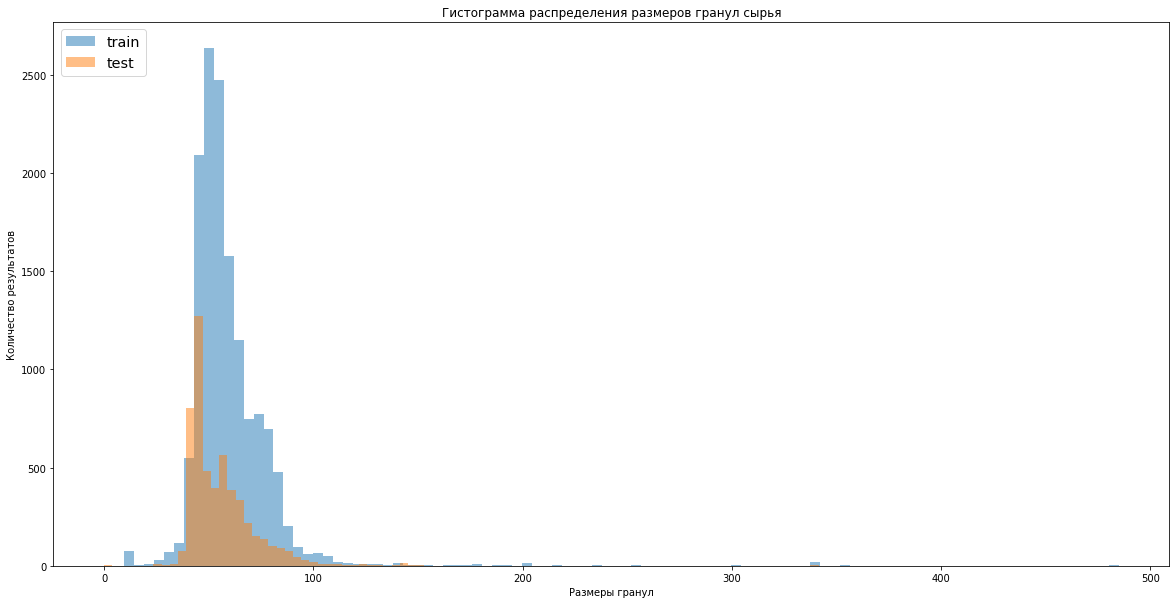

In [27]:
plt.figure(figsize=[20,10])

plt.hist(df_train['rougher.input.feed_size'], bins=100, label = 'train', alpha=.5)
plt.hist(df_test['rougher.input.feed_size'], bins=100, label = 'test', alpha=.5)

plt.xlabel("Размеры гранул")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения размеров гранул сырья")
plt.show()

Распределение гранул до флотации похоже на нормальное со смещением вправо как в обучающей, так и в тестовой выбрке. Существует много выбросов после размера гранул 100.

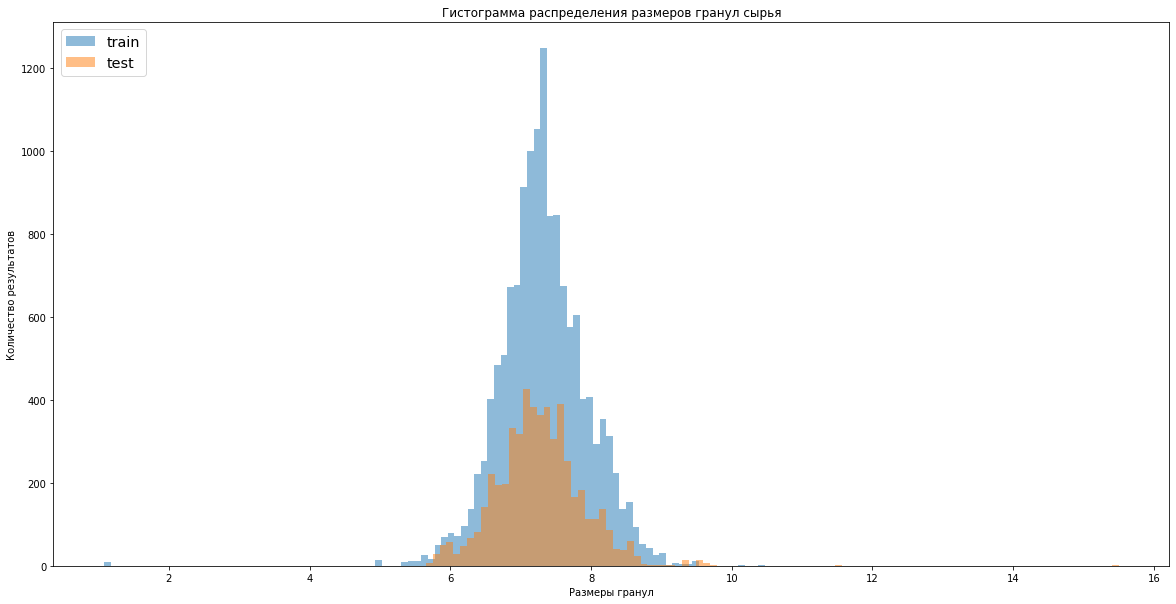

In [28]:
plt.figure(figsize=[20,10])

plt.hist(df_train['primary_cleaner.input.feed_size'], bins=100, label = 'train', alpha=.5)
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=100, label = 'test', alpha=.5)

plt.xlabel("Размеры гранул")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения размеров гранул сырья")
plt.show()

Размеры гранул перед первичной очисткой обладают нормальным распределением. Можель можно обучать.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.


In [29]:
# расчитываю сумарную концентрацию на разных этапах
primary_concentrate = df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_sol']
rougher_concentrate = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_sol']
final_concentrate = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_sol']

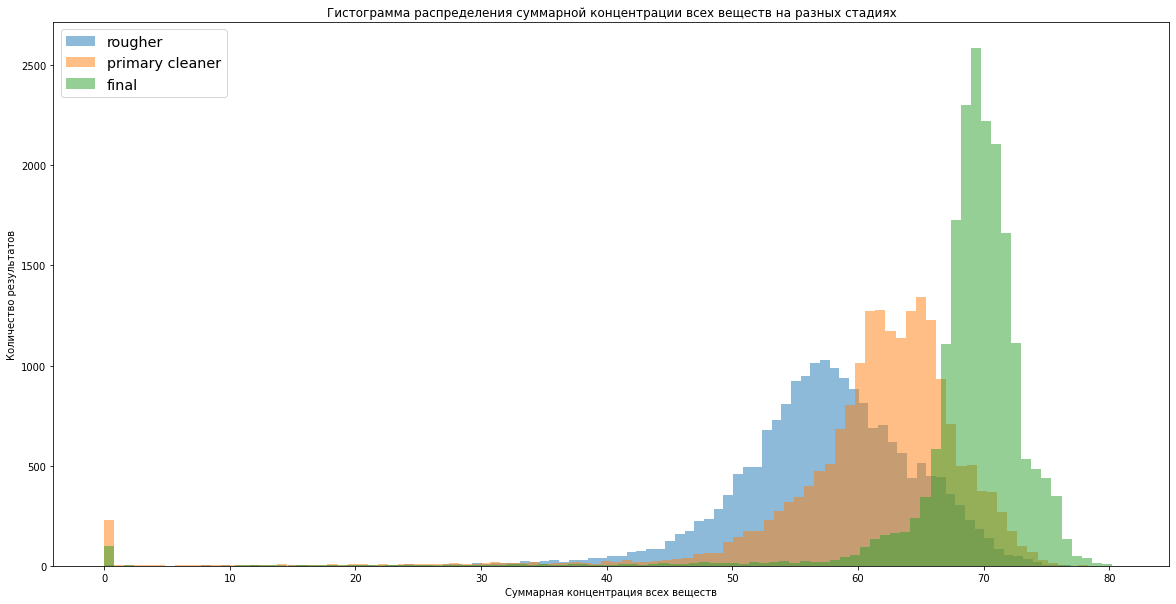

In [30]:
plt.figure(figsize=[20,10])

plt.hist(rougher_concentrate, bins=100, label = 'rougher', alpha=.5)
plt.hist(primary_concentrate, bins=100, label = 'primary cleaner', alpha=.5)
plt.hist(final_concentrate, bins=100, label = 'final', alpha=.5)

plt.xlabel("Cуммарная концентрация всех веществ")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения суммарной концентрации всех веществ на разных стадиях")

plt.show()

Исследование показало, что в данных присутствует много нолевых значений. Концентрация любого этемента на каком то этапе может быть нолевой, но суммарная нолевой быть не может, так как какие то элементы должны присутствовать. По этому я приняла решение удалить строки с нолевыми значениями.

In [31]:
rows_to_delete_full = df_full.query('@primary_concentrate == 0 or @rougher_concentrate == 0 or @final_concentrate == 0').index
rows_to_delete_test = df_test.query('@primary_concentrate == 0 or @rougher_concentrate == 0 or @final_concentrate == 0').index
rows_to_delete_train = df_train.query('@primary_concentrate == 0 or @rougher_concentrate == 0 or @final_concentrate == 0').index

In [32]:
df_full = df_full.drop(rows_to_delete_full, axis=0)
df_test = df_test.drop(rows_to_delete_test, axis=0)
df_train = df_train.drop(rows_to_delete_train, axis=0)

## Построение модели

### Создание функции для вычисления итоговой sMAPE

In [33]:
def sMAPE(true, pred):
    return 100/len(true) * np.sum(2 * np.abs(pred - true) / (np.abs(true) + np.abs(pred)))
scorer = make_scorer(sMAPE, greater_is_better=False)

In [34]:
def total_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25 * sMAPE_rougher + 0.75 * sMAPE_final)

### Обучение модели

#### Для целевого признака 'final.output.recovery'

Выделим целевые признаки в выборках

In [35]:
target_train_final = df_train['final.output.recovery']
target_test_final = df_test['final.output.recovery']
features_train_final = df_train.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis = 1)
features_test_final = df_test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis = 1)

Обучаю константную модель и оцениваю качество кросс-валидацией

In [36]:
dummy = DummyRegressor(strategy = 'median')
scores =  cross_val_score(dummy, features_train_final, target_train_final, cv=5, scoring=scorer)
final_score = scores.mean()
print('sMAPE = ', final_score)

sMAPE =  -11.058801174160369


Обучаю модель LinearRegression и оцениваю качество кросс-валидацией

In [37]:
model = LinearRegression()
scores =  cross_val_score(model, features_train_final, target_train_final, cv=5, scoring=scorer)
final_score = scores.mean()
print('sMAPE = ', final_score)

sMAPE =  -11.844927885977938


Подбираю гиперпараметры для модели DecisionTree, обучаю модель и оцениваю качество кросс-валидацией

In [38]:
model = DecisionTreeRegressor()
parametrs = {'max_depth': range (1, 30, 1)}

grid = GridSearchCV(model, parametrs, cv=5, scoring=scorer)
grid.fit(features_train_final, target_train_final)

grid.best_params_

{'max_depth': 2}

In [39]:
model = DecisionTreeRegressor(random_state = 12345, max_depth = 2)
scores =  cross_val_score(model, features_train_final, target_train_final, cv=5, scoring=scorer)
final_score = scores.mean()
print('sMAPE = ', final_score)

sMAPE =  -10.219306650555556


Подбираю гиперпараметры для модели RandomForest, обучаю модель и оцениваю качество кросс-валидацией

In [40]:
model = RandomForestRegressor()
parametrs = {'n_estimators': range (1, 30, 1)}

grid = GridSearchCV(model, parametrs, cv=5, scoring=scorer)
grid.fit(features_train_final, target_train_final)
grid.best_params_

{'n_estimators': 24}

In [41]:
model = RandomForestRegressor(random_state = 12345, n_estimators = 20)
scores =  cross_val_score(model, features_train_final, target_train_final, cv=5, scoring=scorer)
final_score = scores.mean()
print('sMAPE = ', final_score)

sMAPE =  -11.399598201371155


Лучшей моделью я считаю DecisionTree. Проверяю ее на тестовой выборке

In [42]:
model = DecisionTreeRegressor(random_state = 12345, max_depth = 2)
model.fit(features_train_final, target_train_final)
predictions = model.predict(features_test_final)


In [43]:
sMAPE_final = sMAPE(target_test_final, predictions)
print('sMAPE = ', sMAPE_final)

sMAPE =  9.257159875105962


#### Для целевого признака 'rougher.output.recovery'

Выделим целевые признаки в выборках

In [44]:
target_train_rougher = df_train['rougher.output.recovery']
target_test_rougher = df_test['rougher.output.recovery']
features_train_rougher = df_train[df_train.drop('rougher.output.recovery', axis=1).columns[14:35]]
features_test_rougher = df_test[df_train.drop('rougher.output.recovery', axis=1).columns[14:35]]

Обучаю константную модель и оцениваю качество кросс-валидацией

In [45]:
dummy = DummyRegressor(strategy = 'median')
scores =  cross_val_score(dummy, features_train_rougher, target_train_rougher, cv=5, scoring=scorer)
final_score = scores.mean()
print('sMAPE = ', final_score)

sMAPE =  -11.888308407258759


Обучаю модель LinearRegression и оцениваю качество кросс-валидацией

In [46]:
model = LinearRegression()
scores =  cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring=scorer)
final_score = scores.mean()
print('sMAPE = ', final_score)

sMAPE =  -11.796502168882432


Подбираю гиперпараметры для модели DecisionTree, обучаю модель и оцениваю качество кросс-валидацией

In [47]:
model = DecisionTreeRegressor()
parametrs = {'max_depth': range (1, 30, 1)}

grid = GridSearchCV(model, parametrs, cv=5, scoring=scorer)
grid.fit(features_train_rougher, target_train_rougher)

grid.best_params_

{'max_depth': 3}

In [48]:
model = DecisionTreeRegressor(random_state = 12345, max_depth = 3)
scores =  cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring=scorer)
final_score = scores.mean()
print('sMAPE = ', final_score)

sMAPE =  -12.114754846205873


Подбираю гиперпараметры для модели RandomForest, обучаю модель и оцениваю качество кросс-валидацией

In [49]:
model = RandomForestRegressor()
parametrs = {'n_estimators': range (1, 30, 1)}

grid = GridSearchCV(model, parametrs, cv=5, scoring=scorer)
grid.fit(features_train_rougher, target_train_rougher)
grid.best_params_

{'n_estimators': 19}

In [50]:
model = RandomForestRegressor(random_state = 12345, n_estimators = 17)
scores =  cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring=scorer)
final_score = scores.mean()
print('sMAPE = ', final_score)

sMAPE =  -14.630167578982718


Лучшей моделью я считаю LinearRegression. Проверяю ее на тестовой выборке

In [51]:
model = LinearRegression
model.fit(features_train_rougher, target_train_rougher)
predictions = model.predict(features_test_rougher)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
sMAPE_rougher = sMAPE(target_test_rougher, predictions)
print('sMAPE = ', sMAPE_rougher)

Расчитаю итоговую sMAPE

In [ ]:
total_sMAPE(sMAPE_rougher,sMAPE_final)

## Вывод

В этом проекте я подготовила прототип модели машинного обучения для «Цифры», которая должна предсказать коэффициент восстановления золота из золотосодержащей руды.    
Для выполнения задания я использовала данные с параметрами добычи и очистки.
Были выполнены следующие этапы:
- Подготовка данных
- Исследовательский анализ данных
- Построена и обучена модель

По итогу было решено использовать модель DecisionTree для предсказания эффективности обогащения финального концентрата, и константную модель для предсказания эффективности обогащения чернового концентрата.

Итоговая метрика имеет значение 9.049%